In [1]:
import graphlab as gl
gl.canvas.set_target('ipynb')

# The task, starting with a listing

<img src="http://s3.amazonaws.com/dato-datasets/king_county_property/redfin_screenshot.png">

# Load house listing data

In [24]:
sales = gl.SFrame("http://s3.amazonaws.com/dato-datasets/coursera/home_data/home_data.gl")
#sales = gl.SFrame('home_data')
sales

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000 |    3     |     2     |     1680    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000 |    4     |    4.5    |     5420    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500 |    3     |    2.25   |     1715    |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850 |    3     |    1.5    |     1060    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500 |    3     |     1     |     1780    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000 |    3     |    2.5    |     1890    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |   1    |     0      |  0   |     3     |   6   |    770     |       0       |
|   5000   |   1    |     0      |  0   |     5     |   7   |    1050    |      910      |
|   8080   |   1    |     0      |  0   |     3     |   8   |    1680    |       0       |
|  101930  |   1    |     0      |  0   |     3     |   11  |    3890    |      1530     |
|   6819   |   2    |     0      |  0   |     3     |   7   |    1715    |       0       |
|   9711   |   1    |     0      |  0   |     3     |   7   |    1060    |       0       |
|   7470   |   1    |     0      |  0   |     3     |   7   |    1050    |      730      |
|   6560   |   2    |     0      |  0   |     3     |   7   |    1890    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1933   |      0       |  98028  | 47.73792661 | -122.23319601 |     2720.0    | ... |
|   1965   |      0       |  98136  |   47.52082  | -122.39318505 |     1360.0    | ... |
|   1987   |      0       |  98074  | 47.61681228 | -122.04490059 |     1800.0    | ... |
|   2001   |      0       |  98053  | 47.65611835 | -122.00528655 |     4760.0    | ... |
|   1995   |      0       |  98003  | 47.30972002 | -122.32704857 |     2238.0    | ... |
|   1963   |      0       |  98198  | 47.40949984 | -122.31457273 |     1650.0    | ... |
|   1960   |      0       |  98146  | 47.51229381 | -122.33659507 |     1780.0    | ... |
|   2003   |      0       |  98038  | 47.36840673 |  -122

# Exploring the data and building a simple model

In [4]:
sales.show(view="Scatter Plot", x="sqft_living", y="price")

In [25]:
train_data, test_data = sales.random_split(.8, seed=10101)

In [26]:
sqft_model = gl.linear_regression.create(train_data, target='price', features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16508
PROGRESS: Number of features          : 1
PROGRESS: Number of unpacked features : 1
PROGRESS: Number of coefficients    : 2
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.009555     | 4354673.584983     | 1308525.

In [27]:
print test_data['price'].mean()
print sqft_model.evaluate(test_data)

536455.608787
{'max_error': 4147316.5150162457, 'rmse': 263268.0272365045}


# Let's look at these predictions

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

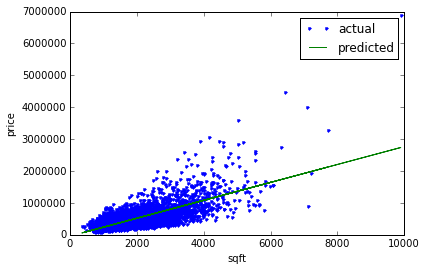

In [29]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', 
         test_data['sqft_living'], sqft_model.predict(test_data),'-')

plt.xlabel('sqft')
plt.ylabel('price')
plt.legend(['actual', 'predicted'])

In [30]:
sqft_model.get('coefficients')

Columns:
	name	str
	index	str
	value	float

Rows: 2

Data:
+-------------+-------+----------------+
|     name    | index |     value      |
+-------------+-------+----------------+
| (intercept) |  None | -44533.4492891 |
| sqft_living |  None | 281.316171312  |
+-------------+-------+----------------+
[2 rows x 3 columns]

# Exploring the data to find other features that matter

In [31]:
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [32]:
sales[basic_features].show()

In [13]:
sales.show(view='BoxWhisker Plot', x='bedrooms',  y='price')

In [14]:
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

who lives in 98039?...

# Building a model with these features

In [33]:
basic_model = gl.linear_regression.create(train_data, target='price', features=basic_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 16477
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 117
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.027549     | 3779796.970835     | 132487

In [34]:
print sqft_model.evaluate(test_data)
print basic_model.evaluate(test_data)

{'max_error': 4147316.5150162457, 'rmse': 263268.0272365045}
{'max_error': 3452764.4784586513, 'rmse': 184614.99426247596}


# Even more features

In [35]:
advanced_features = ['condition', # condition of house
                     'grade', # measure of qality of construction
                     'waterfront', # waterfront property 
                     'view', # type of view
                     'sqft_above', # square feet above ground
                     'sqft_basement', # square feet in basement
                     'yr_built', # the year built
                     'yr_renovated', # the year renovated
                     'lat', 'long', # the lat-long of the parcel
                     'sqft_living15', # average sq.ft. of 15 nearest neighbors 
                     'sqft_lot15', # average lot size of 15 nearest neighbors 
                    ]

In [36]:
advanced_model = gl.regression.create(train_data, target='price', features = basic_features+advanced_features)

PROGRESS: Boosted trees regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17334
PROGRESS: Number of features          : 18
PROGRESS: Number of unpacked features : 18
PROGRESS: Starting Boosted Trees
PROGRESS: --------------------------------------------------------
PROGRESS:   Iter        RMSE Elapsed time
PROGRESS:      0   4.750e+05        0.05s
PROGRESS:      1   3.513e+05        0.10s
PROGRESS:      2   2.662e+05        0.14s
PROGRESS:      3   2.088e+05        0.19s
PROGRESS:      4   1.710e+05        0.23s
PROGRESS:      5   1.460e+05        0.28s
PROGRESS:      6   1.299e+05        0.32s
PROGRESS:      7   1.184e+05        0.37s
PROGRESS:      8   1.117e+05        0.41s
PROGRESS:      9   1.068e+05        0.46s


In [37]:
advanced_model.evaluate(test_data)

{'max_error': 1826862.050319749, 'rmse': 133804.96656066127}

# Comparing the models

In [38]:
print sqft_model.evaluate(test_data)
print basic_model.evaluate(test_data)
print advanced_model.evaluate(test_data)

{'max_error': 4147316.5150162457, 'rmse': 263268.0272365045}
{'max_error': 3452764.4784586513, 'rmse': 184614.99426247596}
{'max_error': 1826862.050319749, 'rmse': 133804.96656066127}


## Applying the Model

In [39]:
#http://info.kingcounty.gov/Assessor/eRealProperty/Detail.aspx?ParcelNbr=5309101200
property1 = test_data[test_data['id']=='5309101200']
property1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [40]:
print property1['price']
print sqft_model.predict(property1)
print advanced_model.predict(property1)

[620000, ... ]
[630625.3618589925]
[649260.2948062551]


In [41]:
#http://info.kingcounty.gov/Assessor/eRealProperty/Detail.aspx?ParcelNbr=1925069082
property2 = test_data[(test_data['id']=='1925069082')]
property2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use len(sf) to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [42]:
print property2['price']
print sqft_model.predict(property2)
print advanced_model.predict(property2)

[2200000, ... ]
[1260773.5855972392]
[2167301.3689004304]


In [43]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [44]:
advanced_model.predict(gl.SFrame(bill_gates))

dtype: float
Rows: 1
[5163372.610466222]